In [1]:
import numpy as np
from CytoNuc_rovnice import NFkBSystemExact
from CytoNuc_params import CytoNucParamsExact
from CytoNuc_simulacia import NFkBSimulatorExact


**PART 1:** Run and Plot the Original Simulation

--- Running Original Simulation (IKK = 0.5 µM) ---


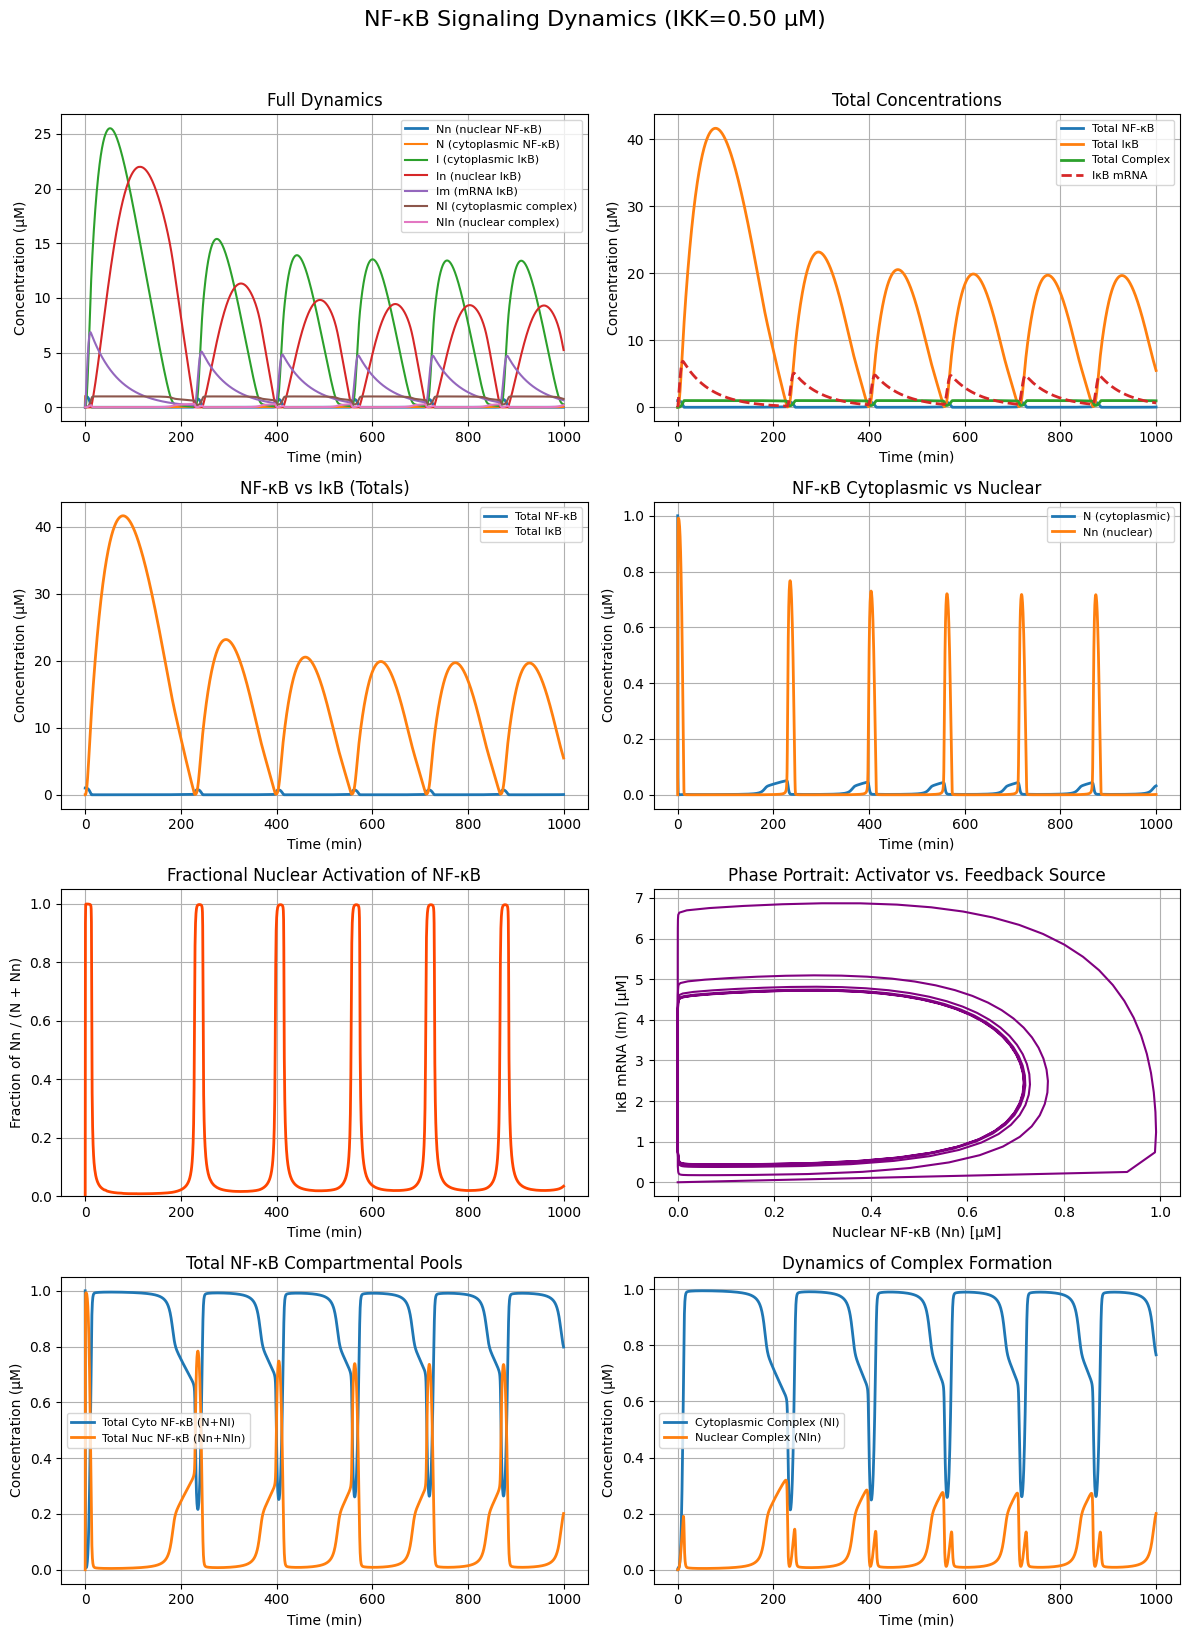

In [2]:
print("--- Running Original Simulation (IKK = 0.5 µM) ---")
original_params = CytoNucParamsExact(IKK_stimulation=0.5)
original_system = NFkBSystemExact(original_params)
sim = NFkBSimulatorExact(original_system)

sol_original = sim.simulate(t_span=(0, 1000))
sim.plot_dynamics(sol_original)

--- Running Original Simulation (IKK = 0.5 µM) ---


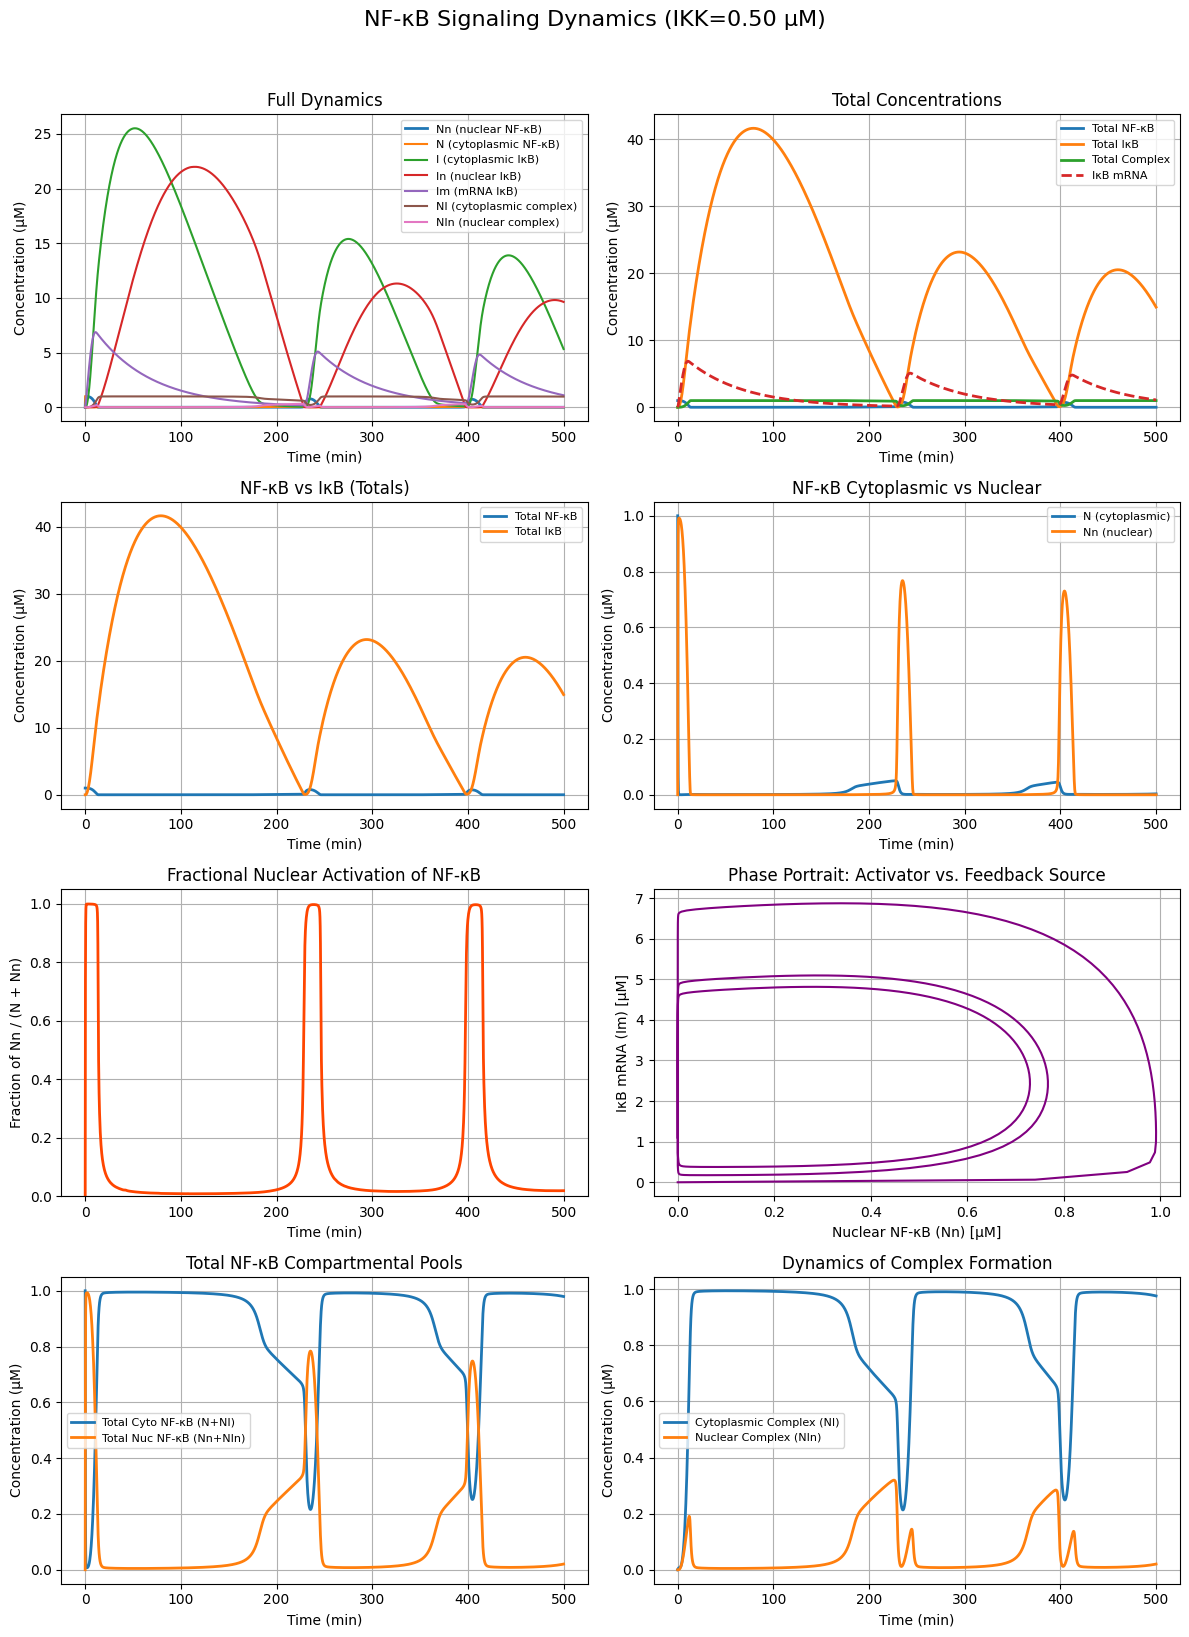

In [3]:
print("--- Running Original Simulation (IKK = 0.5 µM) ---")
original_params = CytoNucParamsExact(IKK_stimulation=0.5)
original_system = NFkBSystemExact(original_params)
sim = NFkBSimulatorExact(original_system)

sol_original = sim.simulate(t_span=(0, 500))
sim.plot_dynamics(sol_original)

**PART 2:** Run and Plot the Pathology Monitoring Pipeline


--- Running Pathology Monitoring Pipeline ---
Running pathology pipeline for 75 stimulus levels...
Pipeline finished.


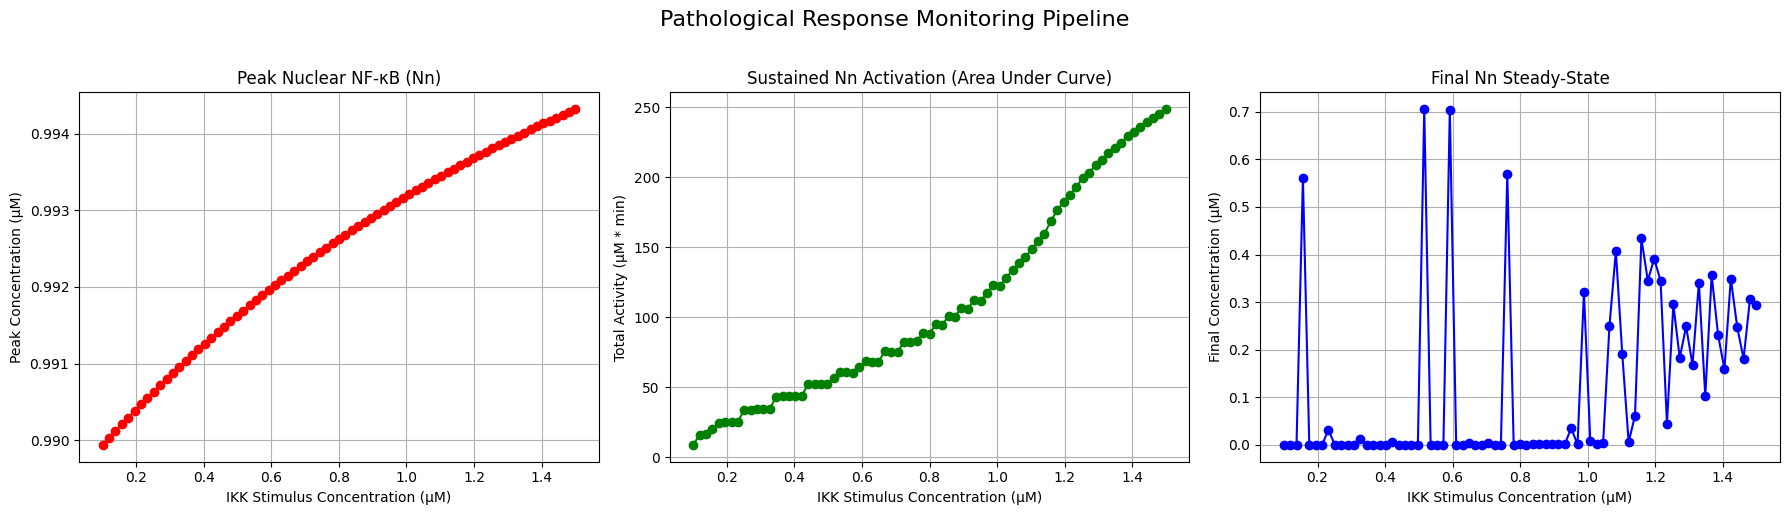

In [4]:
print("\n--- Running Pathology Monitoring Pipeline ---")
IKK_stim_range = np.linspace(0.1, 1.5, 75)

pipeline_results = sim.run_pathology_monitoring(IKK_stim_range)
sim.plot_pathology_report(*pipeline_results)

--- Running Original Simulation (IKK = 1 µM) ---


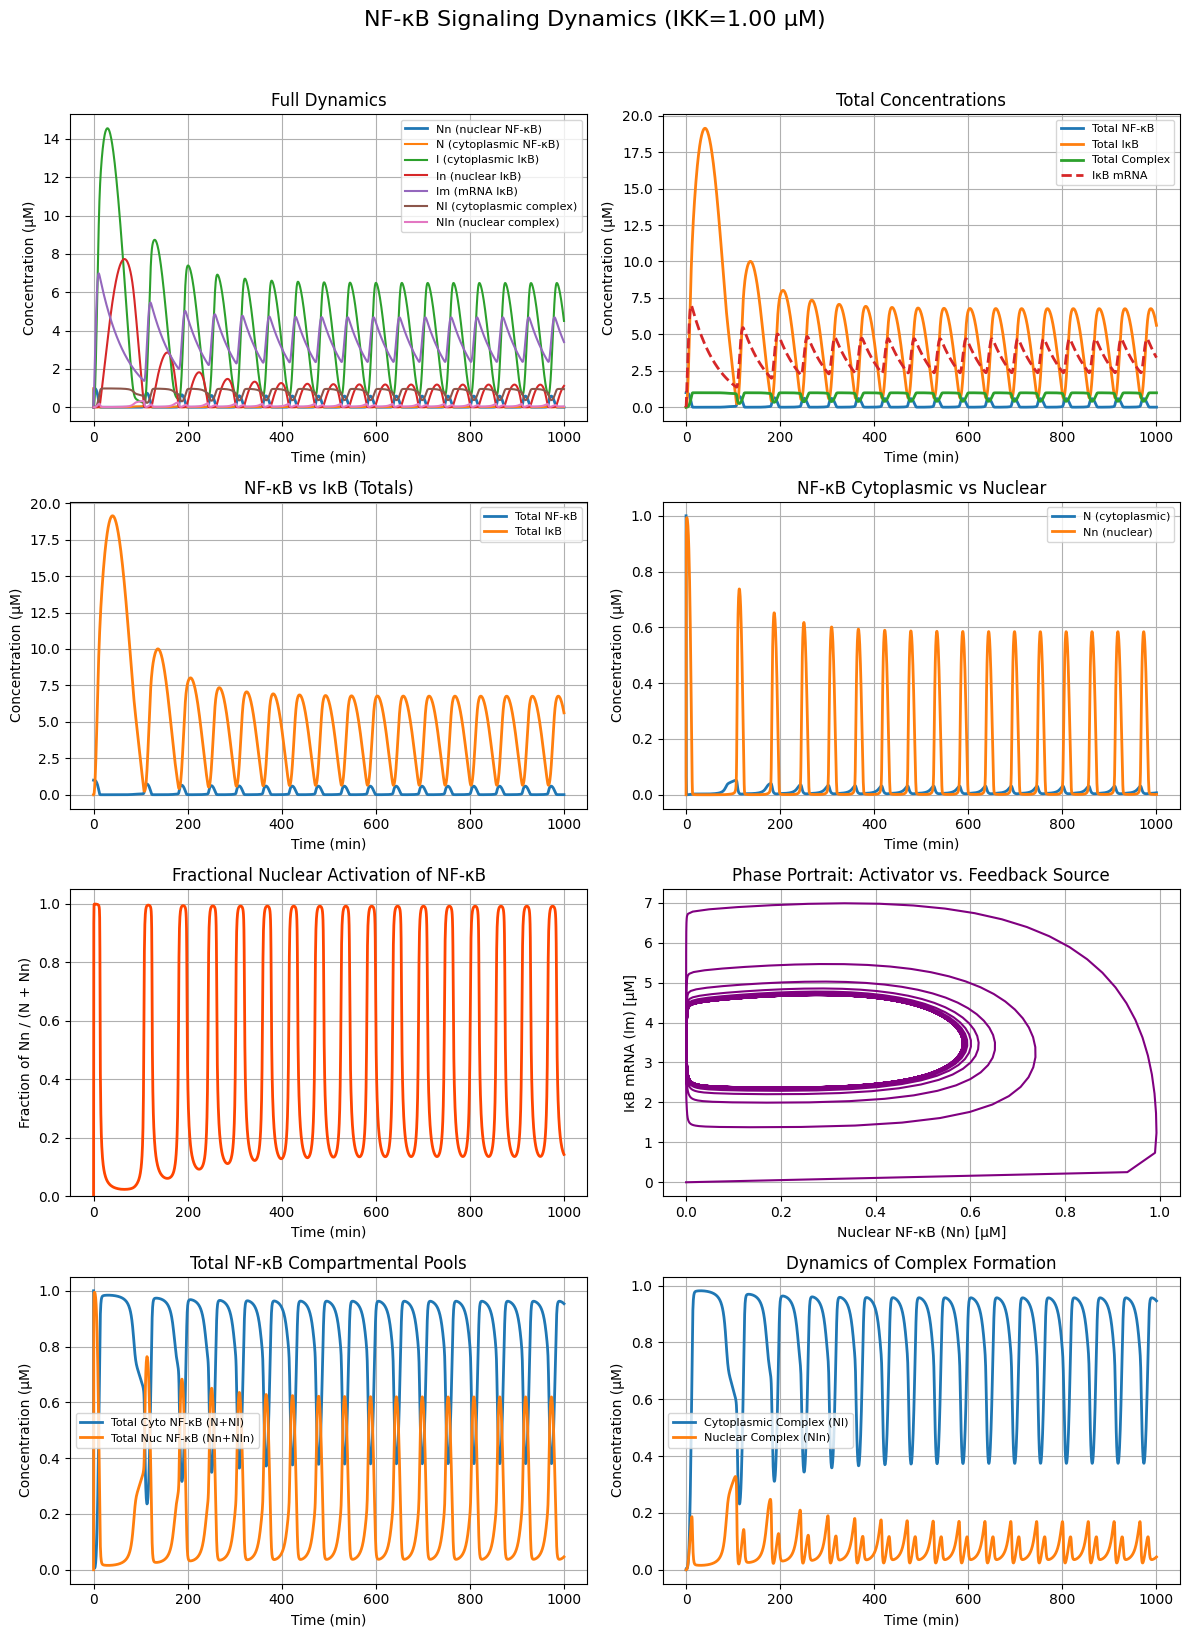

In [5]:
print("--- Running Original Simulation (IKK = 1 µM) ---")
original_params = CytoNucParamsExact(IKK_stimulation=1.0)
original_system = NFkBSystemExact(original_params)
sim = NFkBSimulatorExact(original_system)

sol_original = sim.simulate(t_span=(0, 1000))
sim.plot_dynamics(sol_original)

**PART 3:** NEW - Run and Plot the Sensitivity Analysis


--- Running Sensitivity Analysis for t3 parameter ---
Running sensitivity analysis for 50 't3' levels...
Analysis for 't3' finished.


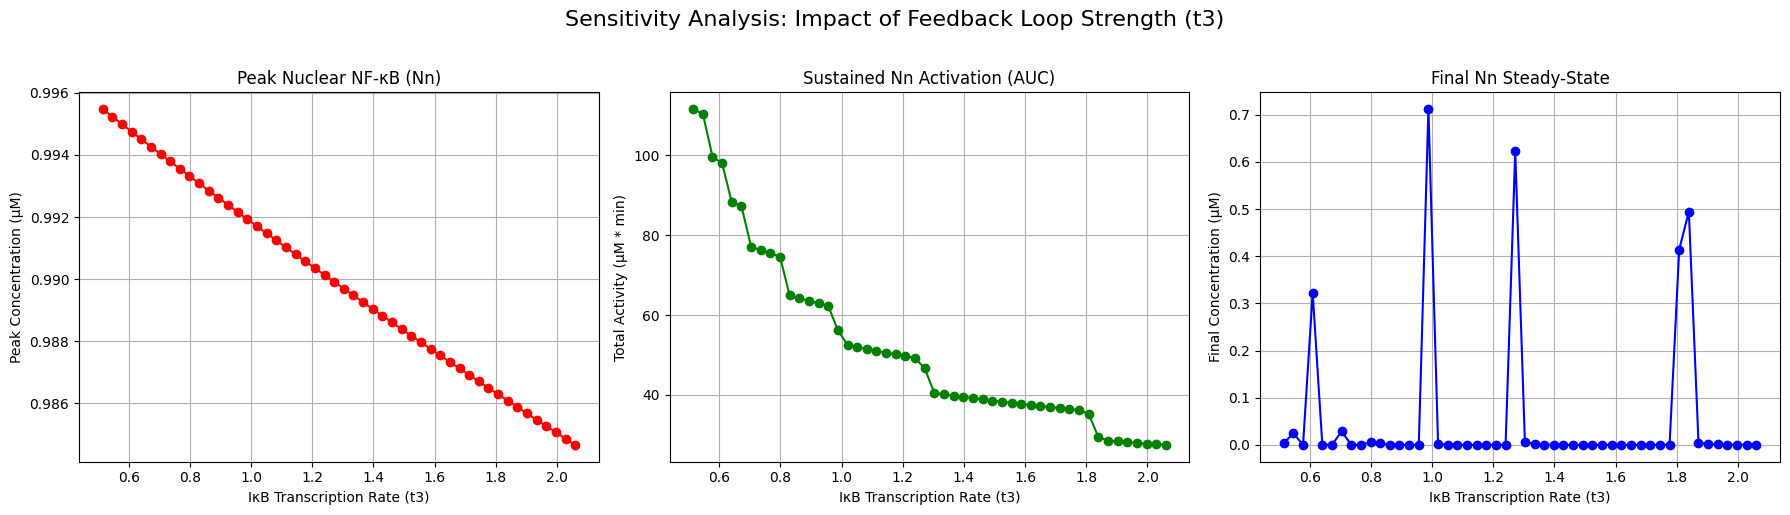

In [6]:
print("\n--- Running Sensitivity Analysis for t3 parameter ---")

# 1. Define the range for the t3 parameter to test
# We will test values from 50% to 200% of the original value (1.03)
t3_original = 1.03
t3_range = np.linspace(0.5 * t3_original, 2.0 * t3_original, 50)

sensitivity_results = sim.run_sensitivity_analysis_t3(t3_range, ikk_stim=0.5)

sim.plot_sensitivity_report_t3(*sensitivity_results)


--- Investigating System Dynamics at a Critical 't3' Value ---


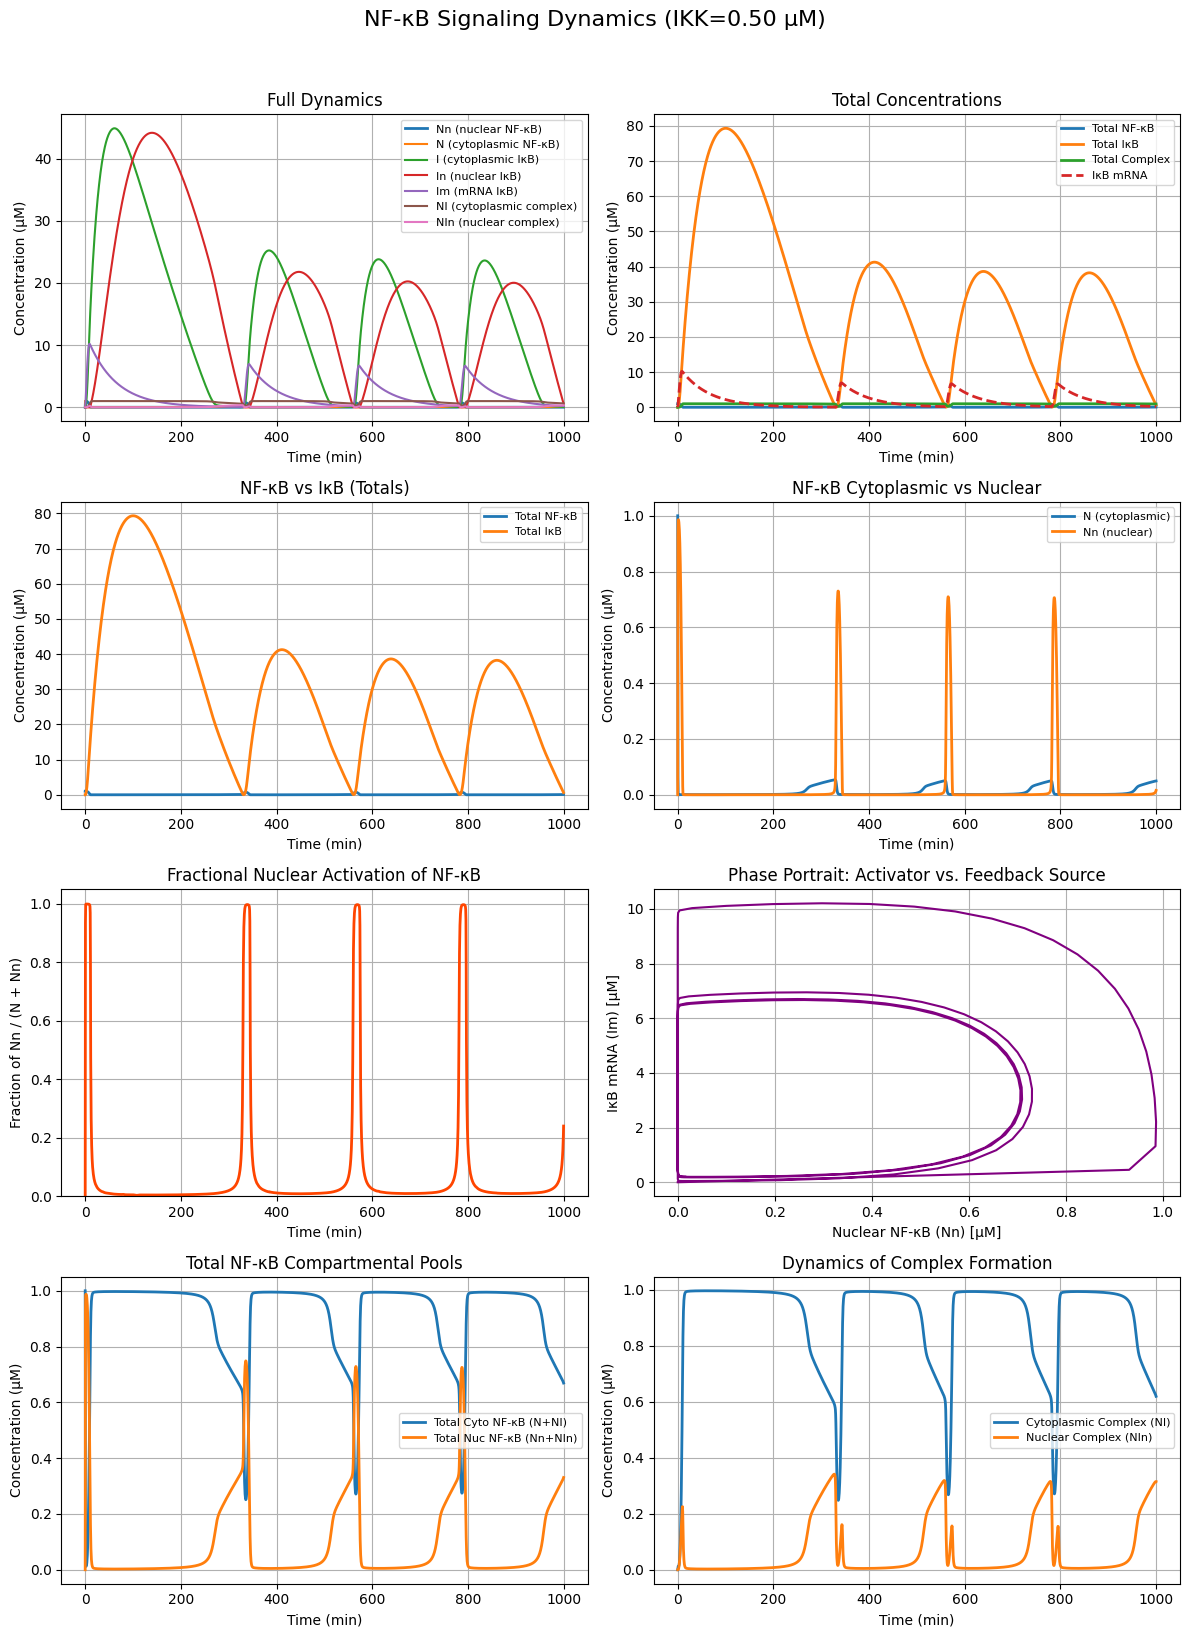

In [7]:
print("\n--- Investigating System Dynamics at a Critical 't3' Value ---")

# 1. Choose a t3 value that caused a high steady-state in the analysis (e.g., ~1.4x baseline)
t3_original = 1.03
t3_critical = 1.8 * t3_original

# 2. Set up the system with this specific parameter
critical_params = CytoNucParamsExact(IKK_stimulation=0.5)
critical_params.t3 = t3_critical  # Override the t3 value
critical_system = NFkBSystemExact(critical_params)
sim_critical = NFkBSimulatorExact(critical_system)

# 3. Run and plot the full dynamics to observe the long-term behavior
# Extend the simulation time to see the steady-state clearly
sol_critical = sim_critical.simulate(t_span=(0, 1000))
sim_critical.plot_dynamics(sol_critical)


--- Running Sensitivity Analysis for Transport Parameters k1 and k2 ---
Running sensitivity analysis for 50 'k1' levels...
Analysis for 'k1' finished.
Running sensitivity analysis for 50 'k2' levels...
Analysis for 'k2' finished.


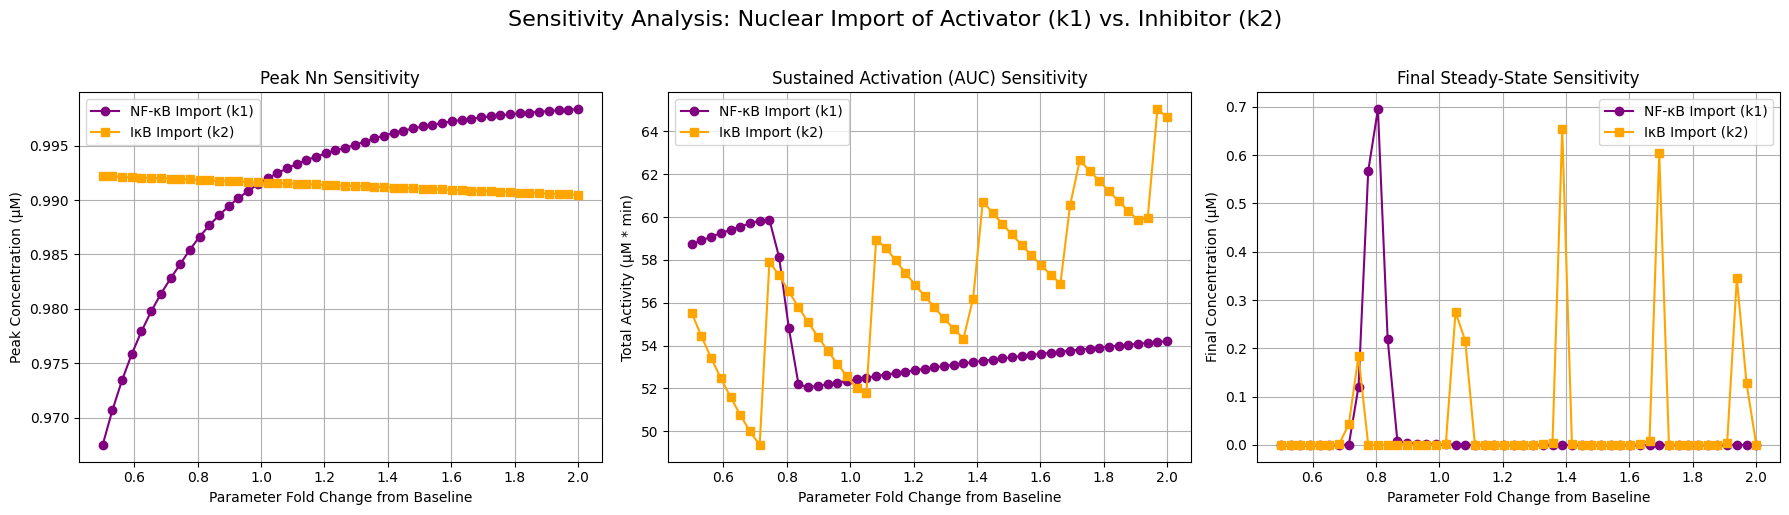

In [8]:
# --- PART 4: NEW - Comparative Sensitivity Analysis for Nuclear Transport ---

print("\n--- Running Sensitivity Analysis for Transport Parameters k1 and k2 ---")

# 1. Define ranges for k1 and k2 (e.g., 50% to 200% of their baseline values)
k1_original = 5.4
k2_original = 0.018
k1_range = np.linspace(0.5 * k1_original, 2.0 * k1_original, 50)
k2_range = np.linspace(0.5 * k2_original, 2.0 * k2_original, 50)

# 2. Run the sensitivity pipeline for k1
k1_results = sim.run_sensitivity_analysis_k1(k1_range, ikk_stim=0.5)

# 3. Run the sensitivity pipeline for k2
k2_results = sim.run_sensitivity_analysis_k2(k2_range, ikk_stim=0.5)

# 4. Plot the comparative sensitivity report
sim.plot_sensitivity_report_transport(k1_results, k2_results)


--- Investigating System Dynamics at a Critical 'k2' Value ---


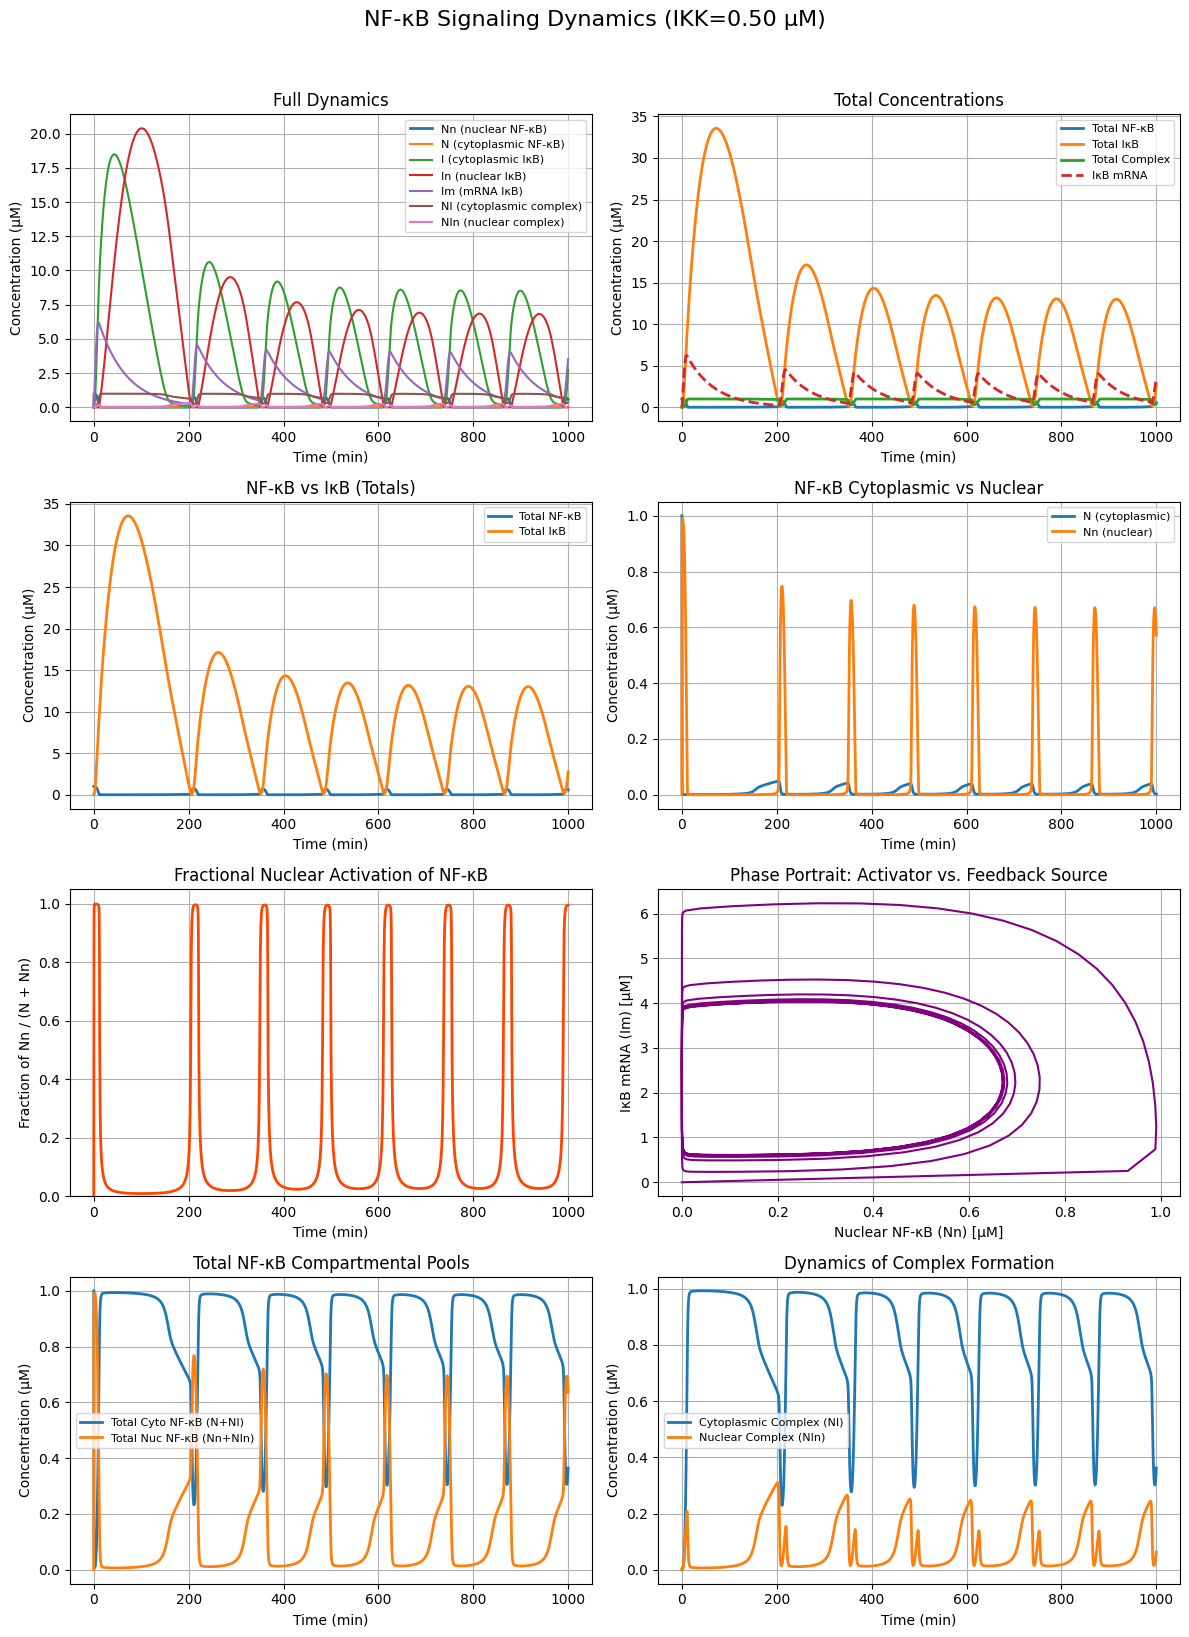

In [9]:
# --- PART 5: NEW - Investigate Dynamics at a Bifurcation Point ---

print("\n--- Investigating System Dynamics at a Critical 'k2' Value ---")

# 1. Choose a k2 value that caused a high steady-state in the analysis (e.g., ~1.4x baseline)
k2_original = 0.018
k2_critical = 1.4 * k2_original

# 2. Set up the system with this specific parameter
critical_params = CytoNucParamsExact(IKK_stimulation=0.5)
critical_params.k2 = k2_critical  # Override the k2 value
critical_system = NFkBSystemExact(critical_params)
sim_critical = NFkBSimulatorExact(critical_system)

# 3. Run and plot the full dynamics to observe the long-term behavior
# Extend the simulation time to see the steady-state clearly
sol_critical = sim_critical.simulate(t_span=(0, 1000))
sim_critical.plot_dynamics(sol_critical)